<a href="https://colab.research.google.com/github/DastanIqbal/LearnOpenCV/blob/main/src/OpenCV/dlap/week6/ApplicationApperialMiniDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the dataset
!wget -O mini-dataset.zip "https://www.dropbox.com/sh/dmjj4tfz3qk4zpu/AACy-H1cHYsEpkP94p9W6hvQa?dl=1"

# Extract the dataset
!unzip -q -u mini-dataset.zip

--2025-02-02 17:32:49--  https://www.dropbox.com/sh/dmjj4tfz3qk4zpu/AACy-H1cHYsEpkP94p9W6hvQa?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fo/u73l3mbup9af9pgdq7vcp/AESatmGBQhz08Fx_6InctlU?rlkey=i1gdutalie0bnl7tumplhrx27&dl=1 [following]
--2025-02-02 17:32:50--  https://www.dropbox.com/scl/fo/u73l3mbup9af9pgdq7vcp/AESatmGBQhz08Fx_6InctlU?rlkey=i1gdutalie0bnl7tumplhrx27&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb480e744ae40d193892cb0f318.dl.dropboxusercontent.com/zip_download_get/CGzE4OKC4Kwxo1KSndMbA_JASJuA7HTZUQD7T_SBex99m-JXNwtlTaYQPO-ylEOIQPsiGbQU96XgeL4rmSQfRAB05iacMZQx2f50KkQABY74Zw# [following]
--2025-02-02 17:32:52--  https://ucb480e744ae40d193892cb0f318.dl.dropboxusercontent.com/zip_

In [2]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Softmax, Dense,Dropout,BatchNormalization,Flatten
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

**Loading Data**

In [3]:
# Defining Data Generator
gen = ImageDataGenerator()
# Defining  Batch Size and seed
BATCH_SIZE = 8
SEED = 21

In [4]:
# Acquring Training images from the directory using flow_from_directory() method.
train_datagen = gen.flow_from_directory(directory = '/content/train',
                                        target_size = (224, 224),
                                        color_mode = "rgb",
                                        classes = None,
                                        class_mode = "categorical",
                                        batch_size = BATCH_SIZE,
                                        shuffle = True,
                                        seed = SEED,
                                        interpolation = "nearest")

Found 500 images belonging to 5 classes.


In [5]:
# Acquring Validation images from the directory using flow_from_directory() method.
val_datagen = gen.flow_from_directory(directory = '/content/val',
                                      target_size = (224, 224),
                                      color_mode = "rgb",
                                      classes = None,
                                      class_mode = "categorical",
                                      batch_size = BATCH_SIZE,
                                      shuffle = True,
                                      seed = SEED,
                                      interpolation = "nearest")

Found 150 images belonging to 5 classes.


In [8]:
# Acquring Testing images from the directory using flow_from_directory() method.
test_datagen = gen.flow_from_directory(directory = '/content/test',
                                       target_size = (224, 224),
                                       color_mode = "rgb",
                                       classes = None,
                                       class_mode = "categorical",
                                       batch_size = 1,
                                       shuffle = False, # Here Shuffle is set to False, so that we can test our model.
                                       seed = SEED,
                                       interpolation = "nearest")

Found 1163 images belonging to 5 classes.


In [9]:
# Classes of images in test dataset
classes = ['Dress', 'Pants', 'Shirt', 'Shoes', 'Shorts']

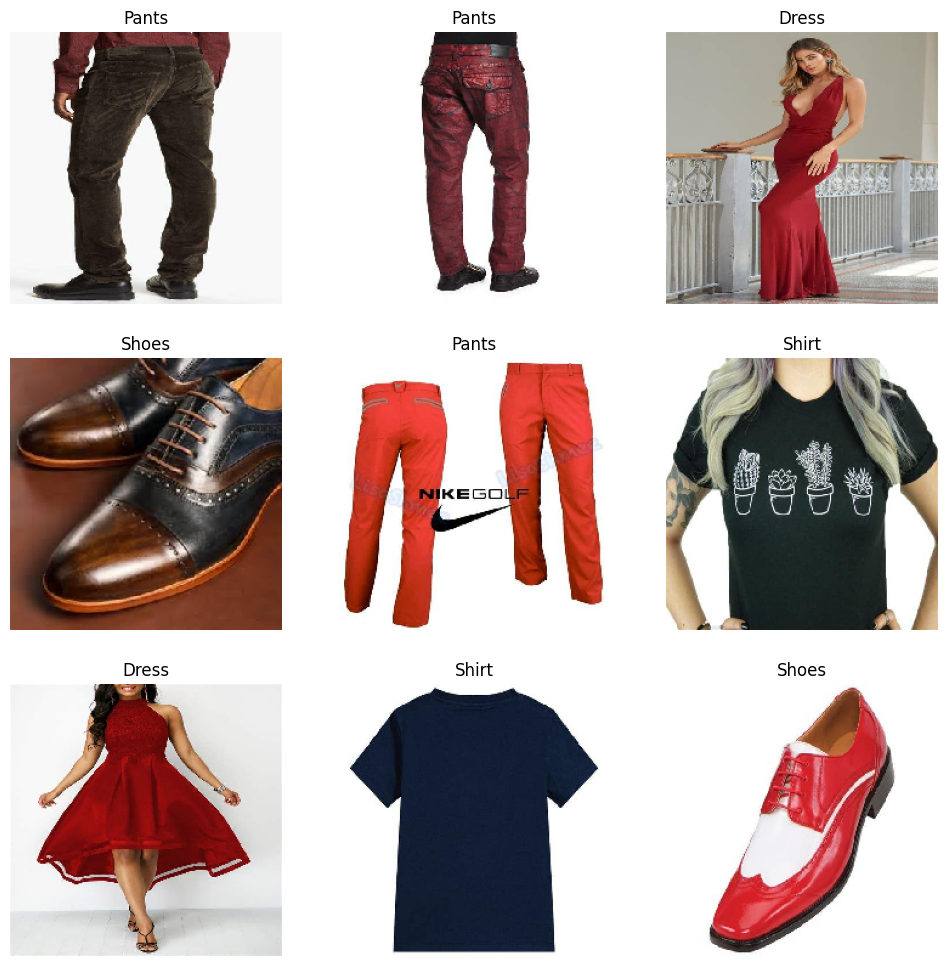

In [10]:
# Preparing the Samples and Plot for displaying output

# Create figure
fig = plt.figure(figsize = (12, 12))
for i in range(9):
  plt.subplot(330 + 1 + i)
  img, label = next(train_datagen)

  label = label[0].astype('uint8')
  label = np.squeeze(label)
  label = np.argmax(label, axis = 0)

  plt.axis('off')
  plt.imshow(img[0].astype(np.uint8))
  plt.title(classes[label])

# Displaying the figure
plt.show()

**Initialize Pre-trained Model**

In [11]:
# Importing EfficientNet B7 Model
image_model = tf.keras.applications.EfficientNetB7(include_top = False,
                                                   weights ='imagenet',
                                                   input_shape = (224, 224, 3),
                                                   pooling = 'max')


258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
# Printing Model Summary
print(image_model.summary())

Model: "efficientnetb7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 64)   │          1,728 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 64)   │            256 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 64)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 64)   │            576 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 64)   │            256 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 64)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 64)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 64)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 16)       │          1,040 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 64,097,687 (244.51 MB)

 Trainable params: 63,786,960 (243.33 MB)

 Non-trainable params: 310,727 (1.19 MB)

None


In [13]:
# Adding Dense, BatchNorm and Droupout layers to base model
# to have output for 5 Class Classification
x = Dense(1024, activation = 'relu')((image_model.output))
x = Dropout(0.5)(x)
x = Dense(512, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dense(16, activation = 'relu')(x)
predictions = Dense(5, activation = 'softmax')(x)

# Define the input and output layers of the model
model = Model(inputs = image_model.input, outputs = predictions)

# Compile model and define Optimizer
model.compile(optimizer = tf.keras.optimizers.Adam(0.0001),
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [14]:
# Printing Final Model Summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 64)   │          1,728 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 64)   │            256 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 64)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 64)   │            576 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 64)   │            256 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 64)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 64)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 64)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 16)       │          1,040 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 67,279,164 (256.65 MB)

 Trainable params: 66,968,309 (255.46 MB)

 Non-trainable params: 310,855 (1.19 MB)

**Callbacks**

In [15]:
# Assigning Checkpoint Path for Saved Model
filepath = '/content/Models/apparel-classification-mini-dataset-EfNetB7_15Epochs.h5'

In [16]:
# Defining ModelCheckpoint Callback
model_save = tf.keras.callbacks.ModelCheckpoint(filepath,
                                                monitor = "val_accuracy",
                                                verbose = 0,
                                                save_best_only = True,
                                                save_weights_only = False,
                                                mode = "max",
                                                save_freq = "epoch")

In [17]:
# Defining Reduce lr callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                 factor = 0.1,
                                                 patience = 6,
                                                 verbose = 1,
                                                 min_delta = 5*1e-3,
                                                 min_lr = 5*1e-9,)

In [18]:
# Saving callbacks in a list
callback = [model_save, reduce_lr]

**Model Training**

In [19]:
# Training the model
history = model.fit(train_datagen,
                    epochs = 15,
                    steps_per_epoch = (len(train_datagen)),
                    validation_data = val_datagen,
                    validation_steps = (len(val_datagen)),
                    shuffle = False,
                    callbacks = callback)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2447 - loss: 1.7815   

63/63 ━━━━━━━━━━━━━━━━━━━━ 402s 2s/step - accuracy: 0.2452 - loss: 1.7805 - val_accuracy: 0.3000 - val_loss: 1.4208 - learning_rate: 1.0000e-04
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.3311 - loss: 1.5509

63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 398ms/step - accuracy: 0.3316 - loss: 1.5501 - val_accuracy: 0.5200 - val_loss: 1.1266 - learning_rate: 1.0000e-04
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.4741 - loss: 1.2760

63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 396ms/step - accuracy: 0.4740 - loss: 1.2761 - val_accuracy: 0.7467 - val_loss: 0.8730 - learning_rate: 1.0000e-04
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.6247 - loss: 1.0650

63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 396ms/step - accuracy: 0.6249 - loss: 1.0644 - val_accuracy: 0.8800 - val_loss: 0.6824 - learning_rate: 1.0000e-04
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.7384 - loss: 0.7858

63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 423ms/step - accuracy: 0.7379 - loss: 0.7862 - val_accuracy: 0.9067 - val_loss: 0.5114 - learning_rate: 1.0000e-04
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.7819 - loss: 0.6555

63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 417ms/step - accuracy: 0.7818 - loss: 0.6556 - val_accuracy: 0.9533 - val_loss: 0.4328 - learning_rate: 1.0000e-04
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.7838 - loss: 0.6842

63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 432ms/step - accuracy: 0.7842 - loss: 0.6836 - val_accuracy: 0.9667 - val_loss: 0.3187 - learning_rate: 1.0000e-04
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 291ms/step - accuracy: 0.8600 - loss: 0.4797 - val_accuracy: 0.9533 - val_loss: 0.2958 - learning_rate: 1.0000e-04
Epoch 9/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 289ms/step - accuracy: 0.8974 - loss: 0.3654 - val_accuracy: 0.9533 - val_loss: 0.2617 - learning_rate: 1.0000e-04
Epoch 10/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 294ms/step - accuracy: 0.9185 - loss: 0.3134 - val_accuracy: 0.9467 - val_loss: 0.2530 - learning_rate: 1.0000e-04
Epoch 11/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 298ms/step - accuracy: 0.9356 - loss: 0.2685 - val_accuracy: 0.9467 - val_loss: 0.2502 - learning_rate: 1.0000e-04
Epoch 12/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 298ms/step - accuracy: 0.9263 - loss: 0.2707 - val_accuracy: 0.9667 - val_loss: 0.1952 - learning_rate: 1.0000e-04
Epoch 13/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 290ms/step - accuracy: 

63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 493ms/step - accuracy: 0.9544 - loss: 0.2187 - val_accuracy: 0.9733 - val_loss: 0.1783 - learning_rate: 1.0000e-04
Epoch 15/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 296ms/step - accuracy: 0.9558 - loss: 0.1825 - val_accuracy: 0.9600 - val_loss: 0.1915 - learning_rate: 1.0000e-04


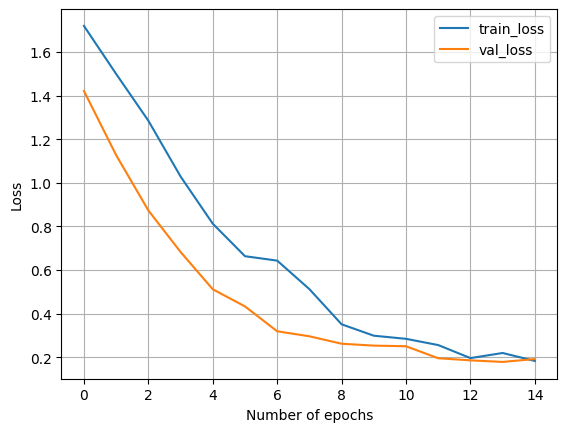

In [20]:
# Summarize history for loss
tr_losses = history.history['loss']
val_losses = history.history['val_loss']
tr_accs = history.history['accuracy']
val_accs = history.history['val_accuracy']
plt.plot(tr_losses, label = "train_loss")
plt.plot(val_losses, label = "val_loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

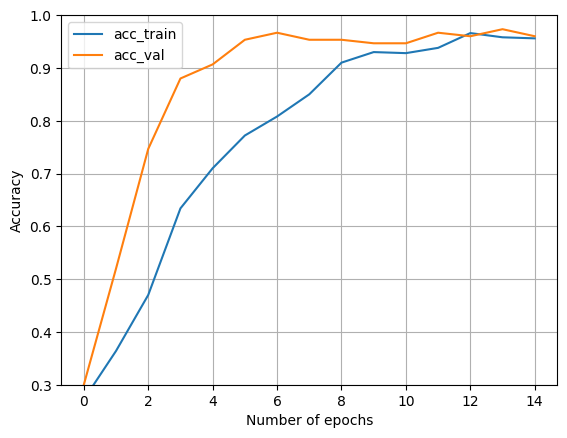

In [21]:
# Summarize history for accuracy
plt.plot(tr_accs, label = "acc_train")
plt.plot(val_accs, label = "acc_val")
plt.ylim((0.3, 1.))
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

**Model Evaluation**

In [22]:
# Prediction Function
predictions = model.predict(test_datagen, verbose = 1, steps = (len(test_datagen)))

1163/1163 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step


In [23]:
# Only save class with highest confidence for each image
predictions.squeeze().argmax(axis = 1)

array([0, 0, 0, ..., 4, 4, 4])

In [24]:
# Classification Report
print(classification_report(test_datagen.classes, predictions.squeeze().argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       268
           1       0.96      0.92      0.94       290
           2       0.89      0.98      0.94       169
           3       0.95      0.98      0.97       343
           4       0.94      0.91      0.93        93

    accuracy                           0.95      1163
   macro avg       0.94      0.94      0.94      1163
weighted avg       0.95      0.95      0.95      1163



Confusion Matrix


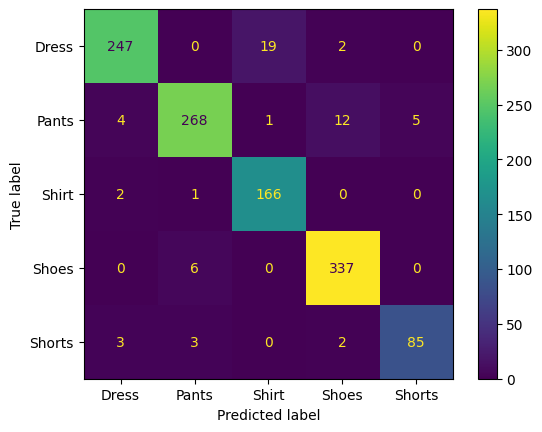

In [25]:
# Confusion Matrix
print('Confusion Matrix')
cm = confusion_matrix(test_datagen.classes, predictions.squeeze().argmax(axis = 1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp = disp.plot(include_values = True,
                 values_format = 'd',
                 cmap = 'viridis',
                 ax = None,
                 xticks_rotation = 'horizontal')

plt.show()

**External Test Images**

In [26]:
def test(path):

  # Load the image using keras
  img = tf.keras.preprocessing.image.load_img(path,
                                              color_mode = 'rgb',
                                              target_size = (224, 224, 3),
                                              interpolation = 'nearest')

  # Display the image
  plt.imshow(img)
  plt.axis('off')

  # Convert image to array for feeding it to the model
  img_array = np.asarray(img)

  # Expand dimension of img array
  img_array = np.expand_dims(img_array, 0)

  # Take prediction
  predictions = model.predict(img_array)

  # Evaluate Score
  score = predictions[0]

  return print('This image is a {} with a {:.2f} % confidence.'.format(classes[np.argmax(score)], 100 * np.max(score)))

In [27]:
# Download test images
!wget -O test-images.zip "https://www.dropbox.com/sh/2hpc50t687r0fdt/AADokyQsM-0kacFVl5KL-ONTa?dl=1"

# Extract images
!unzip -q -u test-images.zip

--2025-02-02 17:49:35--  https://www.dropbox.com/sh/2hpc50t687r0fdt/AADokyQsM-0kacFVl5KL-ONTa?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fo/92zbn8kq0029hyocdk5s1/AM_jAOMy47MuWklkW7ICt0w?rlkey=w6sel508cix1ehpf540m4ix9d&dl=1 [following]
--2025-02-02 17:49:35--  https://www.dropbox.com/scl/fo/92zbn8kq0029hyocdk5s1/AM_jAOMy47MuWklkW7ICt0w?rlkey=w6sel508cix1ehpf540m4ix9d&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucee197324a23158986b374596c0.dl.dropboxusercontent.com/zip_download_get/CGyJHR7E2UUnxiG4bgeAjAjsRw0xxHElMgIFEwhX8Nt1Ds21A_Y2Q2z9zn7ilr7YbZN7OLr_9VTJSSbWSgwsc7HupiA8bw9CJqU1iaUskc4caQ# [following]
--2025-02-02 17:49:36--  https://ucee197324a23158986b374596c0.dl.dropboxusercontent.com/zip_

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
This image is a Shirt with a 65.14 % confidence.


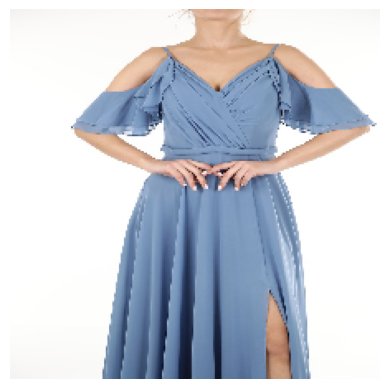

In [28]:
# Testing Image
test('/content/test-image-1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
This image is a Shoes with a 41.86 % confidence.


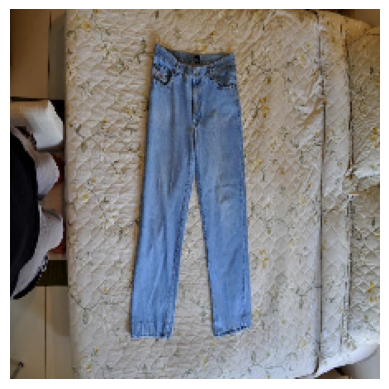

In [29]:
# Testing Image
test('/content/test-image-2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
This image is a Shoes with a 98.13 % confidence.


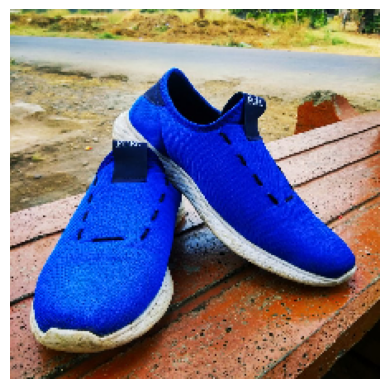

In [30]:
# Testing Image
test('/content/test-image-3.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
This image is a Shorts with a 47.98 % confidence.


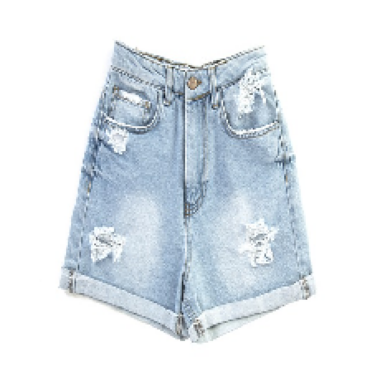

In [31]:
# Testing Image
test('/content/test-image-4.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
This image is a Shirt with a 98.23 % confidence.


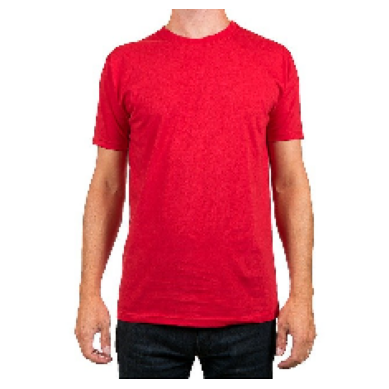

In [32]:
# Testing Image
test('/content/test-image-5.jpg')